# Import and setting

In [1]:
# ---------- import
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [2]:
# ---------- figure size
plt.rcParams['figure.figsize'] =[8, 6]

# ---------- axes
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.linewidth'] = 1.5

# ---------- ticks
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = 1.0
plt.rcParams['ytick.major.width'] = 1.0
plt.rcParams['xtick.major.size'] = 8.0
plt.rcParams['ytick.major.size'] = 8.0

# ---------- lines
plt.rcParams['lines.linewidth'] = 2.5

# ---------- grid
plt.rcParams['grid.linestyle'] = ':'

# ---------- font
plt.rcParams['font.size'] = 20
#plt.rcParams['pdf.fonttype'] = 42    # embed fonts in PDF using type42 (True type)

# Data

In [3]:
def load_pkl(filename):
    with open(filename, 'rb') as f:
        return pickle.load(f)

In [4]:
rslt_data = load_pkl('./pkl_data/rslt_data.pkl')

# ---------- sort by Energy
rslt_data.sort_values(by=['E_eV_atom']).head(10)

,Spg_num,Spg_sym,Spg_num_opt,Spg_sym_opt,E_eV_atom,Magmom,Opt
2,33,Pna2_1,33,Pna2_1,-3.397373,NaN,done
9,80,I4_1,80,I4_1,-3.288571,NaN,done
6,62,Pnma,62,Pnma,-3.180439,NaN,done
3,156,P3m1,156,P3m1,-2.858680,NaN,done
8,105,P4_2mc,105,P4_2mc,-2.778002,NaN,done
4,111,P-42m,123,P4/mmm,-2.733486,NaN,done
0,47,Pmmm,47,Pmmm,-2.511932,NaN,done
7,213,P4_132,213,P4_132,-2.452212,NaN,done
5,221,Pm-3m,221,Pm-3m,-2.302506,NaN,done
1,131,P4_2/mmc,131,P4_2/mmc,-1.986213,NaN,done


In [5]:
# ---------- Number of structures
ndata = len(rslt_data)
print('Number of data: {}'.format(ndata))

# ---------- check success and error
nsuccess = rslt_data['E_eV_atom'].count()
nerror = ndata - nsuccess
print('Success: {}'.format(nsuccess))
print('Error: {}'.format(nerror))

# ---------- minimum
Emin = rslt_data['E_eV_atom'].min()
print('Emin: {} eV/atom'.format(Emin))

Number of data: 10
Success: 10
Error: 0
Emin: -3.3973728125 eV/atom


# Energy vs. trial

Text(0, 0.5, 'Energy (eV/atom)')

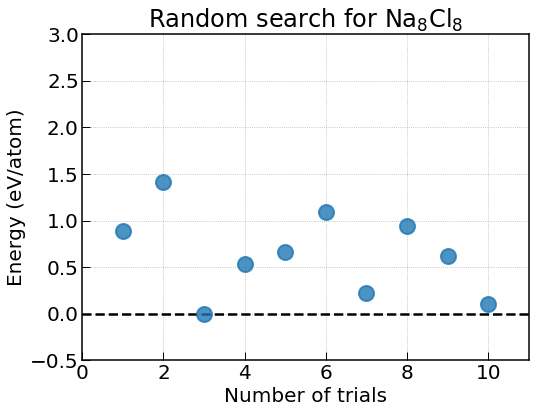

In [7]:
fig, ax = plt.subplots()

# ---------- axis
dx = 1
ax.set_xlim([0, ndata+dx])
ax.set_ylim([-0.5, 3])

# ---------- hline at zero
ax.hlines(0.0, -dx, ndata+dx, 'k', '--')

# ---------- plot
# x <-- ID + 1
ax.plot(rslt_data.index + 1, rslt_data['E_eV_atom'] - Emin, 'o', ms=15, mew=2.0, alpha=0.8)

# ---------- title and label
ax.set_title('Random search for Na$_8$Cl$_8$')
ax.set_xlabel('Number of trials')
ax.set_ylabel('Energy (eV/atom)')

In [8]:
# ---------- save figure
fig.savefig('Na8Cl8_RS.png', bbox_inches='tight')    # PNG
#fig.savefig('title_RS.png', bbox_inches='tight', dpi=300)    # high dpi PNG
#fig.savefig('title_RS.pdf', bbox_inches='tight')    # PDF